# Predict the electrical energy output of a Combined Cycle Power Plant 🌱

### The problem
We need to predict the electrical energy output of a Combined Cycle Power Plant, which uses a combination of gas turbines, steam turbines, and heat recovery steam generators to generate power.  We have a set of 9568 hourly average ambient environmental readings from sensors at the power plant which we will use in our model.


### The solution
Since we're targeting a metric, we have to build a regression model that takes into consideration Temperature (T), Ambient Pressure (AP), Relative Humidity (RH), Exhaust Vacuum (V) as variables, features to predict a target Net hourly electrical energy output (PE). I'm thinking to try two regression models that are simple and parametric: Linear Regression and Decision tree Regression.

### The prefered metric
MAPE is calculated as the absolute value of the difference between the actual value and the predictions regenerating divided by the actual values. We sum that up and divide by the total number of productions to get our MAPE value.

Why MAPE? It converts error into a percentage, very easy to interpret and compare.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

Determine which possible features we may want to use in the model, and identify the different algorithms we might consider.



In [2]:
# Loading the data
dataset = pd.read_csv('../input/ccpp-data/CCPP_data.csv')
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# Let's see what we got
dataset.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [4]:
# Checking if data type are correct
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


<AxesSubplot:xlabel='AT', ylabel='PE'>

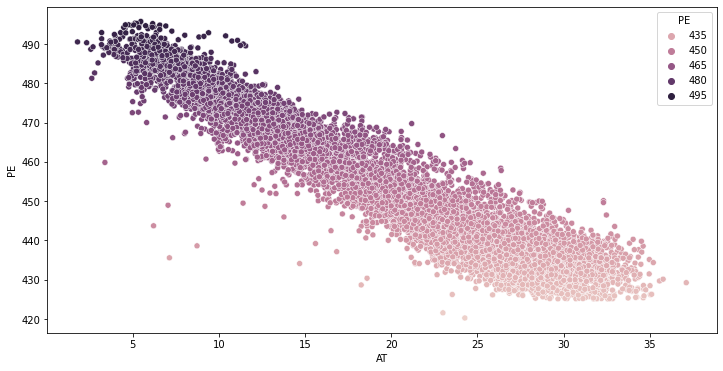

In [5]:
#bivariate analysis
plt.figure(figsize=(12,6))
sns.scatterplot(data=dataset, x='AT', y='PE', hue='PE')

<AxesSubplot:xlabel='V', ylabel='PE'>

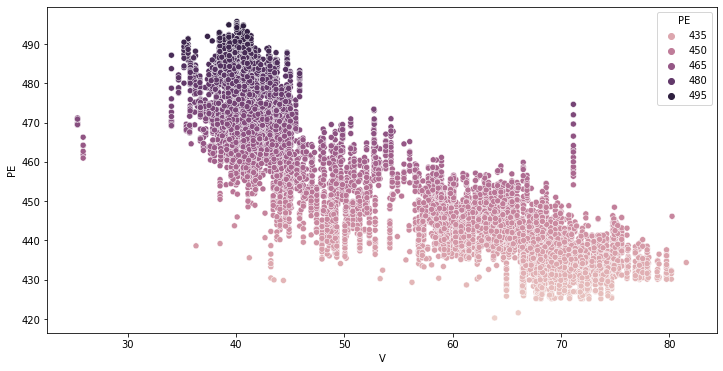

In [6]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=dataset, x='V', y='PE', hue='PE')

<AxesSubplot:xlabel='AP', ylabel='PE'>

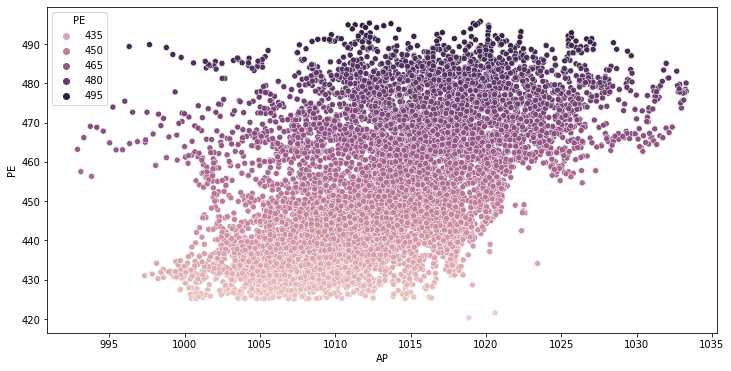

In [7]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=dataset, x='AP', y='PE', hue='PE')

<AxesSubplot:xlabel='RH', ylabel='PE'>

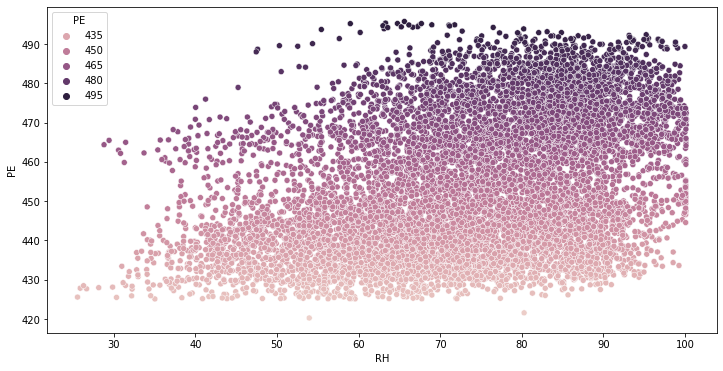

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=dataset, x='RH', y='PE', hue='PE')

Since we've seen a clean scatterplot that shows that could be a correlation, and ans few outliers. Let's plot a correlation heatmap.

<AxesSubplot:>

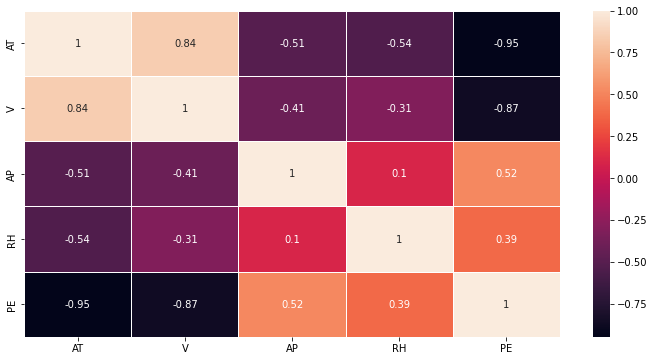

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5)

Conclusion: it's clean enough, no need to perform data cleaning or further Exploratory Data Analysis. We can see a high correlation between the temperature and the energy output, our target. Also with Exhaust Vacuum. This insight we will help us for the modeling part.

### Modeling

Split your data to create a test set to evaluate the performance of your final model.  Then, using your training set, determine a validation strategy for comparing different models - a fixed validation set or cross-validation.  Depending on whether you are using Excel, Python or AutoML for your model building, you may need to manually split your data to create the test set and validation set / cross validation folds.

Use your validation approach to compare at least two different models (which may be either 1) different algorithms, 2) the same algorithm with different combinations of features, or 3) the same algorithm and features with different values for hyperparameters).  From among the models you compare, select the model with the best performance on your validation set as your final model.

1️⃣ Linear Regression

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
#from sklearn.metrics import mean_absolute_percentage_error

In [11]:
X1 = dataset.iloc[:, 0:1].values # We choose AT since correlation between AT and PE is -0.95
y1 = dataset.iloc[:, -1].values # PE

In [12]:
X1

array([[14.96],
       [25.18],
       [ 5.11],
       ...,
       [31.32],
       [24.48],
       [21.6 ]])

In [13]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [14]:
lr_model = LinearRegression()
lr_model.fit(X1_train, y1_train)

LinearRegression()

In [15]:
# Predicting the Test set results
y1_pred = lr_model.predict(X1_test) 
np.set_printoptions(precision=2)  # to print 2 decimals
print(np.concatenate(
    (y1_pred.reshape(len(y1_pred),1), y1_test.reshape(len(y1_test),1)),axis=1)
) # so we can compare prediction and test values

[[434.76 431.23]
 [459.05 460.01]
 [464.75 461.14]
 ...
 [470.44 473.26]
 [437.76 438.  ]
 [459.49 463.28]]


In [16]:
import math
# Evaluating the Model Performance
lr_score = r2_score(y1_test, y1_pred)
#lr_MAPE_score = mean_absolute_percentage_error(y1_test, y1_pred)

#Make it into a percentage
#lr_MAPE_score = lr_MAPE_score*100
#lr_MAPE_score = round(lr_MAPE_score, 2)


print('R square is',lr_score)
#print('MAPE is',lr_MAPE_score,'%')

R square is 0.9049536175690113


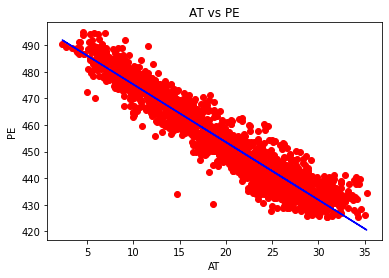

In [17]:
# Visualising the Test set results
plt.scatter(X1_test, y1_test, color = 'red')  
plt.plot(X1_test, lr_model.predict(X1_test), color = 'blue')   
plt.title('AT vs PE')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

2️⃣ Decision Tree Regression

In [18]:
X2 = dataset.iloc[:, :-1].values
y2 = dataset.iloc[:, -1].values

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [20]:
# Training the Decision Tree Regression model on the Training set
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(random_state = 0)
dtr_model.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=0)

In [21]:
# Predicting the Test set results
y2_pred = dtr_model.predict(X2_test)
np.set_printoptions(precision=2)
print(np.concatenate
      ((y2_pred.reshape(len(y2_pred),1), y2_test.reshape(len(y2_test),1)),
       axis=1))

[[431.28 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.74 463.28]]


In [22]:
#Evaluating the Model Performance
dtr_score = r2_score(y2_test, y2_pred)
#dtr_MAPE_score = mean_absolute_percentage_error(y2_test, y2_pred)

#Make it into a percentage
#dtr_MAPE_score = dtr_MAPE_score*100
#dtr_MAPE_score = round(dtr_MAPE_score, 2)

print('R square is',dtr_score)
#print('MAPE is',dtr_MAPE_score,'%')

R square is 0.922905874177941


### Results


Evaluate the performance of your final model using the output metric you defined earlier.  



In [23]:
print('The Linear Regression R square result is', lr_score,'%')
print('The Decision Tree R square result is', dtr_score,'%')

The Linear Regression R square result is 0.9049536175690113 %
The Decision Tree R square result is 0.922905874177941 %


In [24]:
# The judge function
print('Annnnnd the winner is...')

if lr_score < dtr_score:
  print('Decision Tree with a R2 of', dtr_score,'% 💖')
else:
    print('LR IS WINNER with a R2 of', lr_score,'% 💖')

Annnnnd the winner is...
Decision Tree with a R2 of 0.922905874177941 % 💖


# Try it yourself

If you want to try by yourself, you can modify the number inside the input_array variable and run it.
It will fire the Linear regression model.

In [25]:
input_array = [[22]]
test_pred = lr_model.predict(input_array)
test_pred

array([449.23])